In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
from time import sleep 
import scrapy
import random
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import time
from pandas import ExcelWriter
import xlsxwriter
import openpyxl
from openpyxl import workbook

In [2]:
import getpass
Usuario = input("Ingrese su correo USS: ")
Contraseña = getpass.getpass("Ingrese contraseña(Se vera oculta): ")
print(Usuario, Contraseña)

jgonzalezt5@correo.uss.cl 521feeaa9D


In [ ]:
#Vamos a la Pag principal entregada y seleccionamos el apartado
driver = webdriver.Chrome("./chromedriver.exe")
driver.get("https://biblioteca.uss.cl/dpto-referencia-y-recursos-electr/base-de-datos")
time.sleep(3)
boton = driver.find_element(By.XPATH, '//div[@class="wrapp"]//div[@class="content"]//div[@class="colecciones"]//h1[contains(text(), "Web of Science")]')
boton.click()
#Apretamos 
driver.close()
time.sleep(2)
driver.switch_to.window(driver.window_handles[0])
driver.get("https://bdigitaluss.remotexs.co/user/login?dest=http%3A%2F%2Fapps.webofknowledge.com.bdigitaluss.remotexs.co%2FWOS_GeneralSearch_input.do%3Flocale%3Des_LA%26errorKey%3D%26errorKey%3D%26errorKey%3D%26product%3DWOS%26search_mode%3DGeneralSearch%26viewType%3Dinput%26preferencesSaved%3D%26SID%3D6BLBdgq8AkGcFmeD7jW")
time.sleep(3)
botonClavUnica = driver.find_element(By.XPATH, '//div[@class="totonaca"]//a[@class="boton_personalizado"]')
botonClavUnica.click()

#Nos dirijimos a la nueva pestaña e ingresamos el usuario
time.sleep(2)
botonUsuario = driver.find_element(By.XPATH, '//input[@name="loginfmt"]')
botonUsuario.send_keys(Usuario)
time.sleep(2)
botonSiguiente = driver.find_element(By.XPATH, '//div[@class="inline-block"]//input[@id="idSIButton9"]')
botonSiguiente.click()

#Nos dirijimos a la nueva pestaña e ingresamos la Contraseña
time.sleep(2)
botonContraseña = driver.find_element(By.XPATH, '//div[@class="placeholderContainer"]//input[@name="passwd"]')
botonContraseña.send_keys(Contraseña)
time.sleep(2)
botonSiguiente = driver.find_element(By.XPATH, '//div[@class="inline-block"]//input[@id="idSIButton9"]')
botonSiguiente.click()
#Continuamos
time.sleep(2)
botonSiguiente = driver.find_element(By.XPATH, '//div[@class="inline-block"]//input[@id="idBtn_Back"]')
botonSiguiente.click()
time.sleep(15)

#Recargamos la pagina
driver.get("http://www.webofscience.com.bdigitaluss.remotexs.co/wos/woscc/basic-search")
time.sleep(9)

#Cerramos pestañas emergentes
botonExtra = driver.find_element(By.XPATH, '//div[@id="pendo-g-2nOetVy8rUwY0Hi-z-UzaUE9e5E"]//div[@id="pendo-guide-container"]//button[@id="pendo-close-guide-5600f670"]')
botonExtra.click()
time.sleep(2)
botonExtra = driver.find_element(By.XPATH, '//div[@class="_pendo-step-container-size"]//div[@id="pendo-guide-container"]//button[@class="_pendo-close-guide"]')
botonExtra.click()
time.sleep(2)
    
#Ingresamos la busqueda y continuamos
Busqueda = "Security TI"
botonBusqueda = driver.find_element(By.XPATH, '//div[@class="search-form"]//div[@class="mat-form-field-infix ng-tns-c60-7"]//input[@name="search-main-box"]')
botonBusqueda.send_keys(Busqueda)
time.sleep(2)

#Filtramos por fechas
botonF1 = driver.find_element(By.XPATH, '//div[@style="display: inline-block;"]//button[@class="mat-focus-indicator cdx-but-md uppercase-button add-timespan-row mat-stroked-button mat-button-base mat-primary ng-star-inserted"]')
botonF1.click()
time.sleep(2)
botonF2 = driver.find_element(By.XPATH, '//div[@class="row ng-star-inserted"]//div[@class="timespan-select-holder"]//button[@class="dropdown"]')
botonF2.click()
time.sleep(2)
botonF3 = driver.find_element(By.XPATH, '//div[@class="timespan-select-holder"]//div[@class="dropdown-panel ng-star-inserted"]//div[@class="options"]/div[last()]')
botonF3.click()
time.sleep(2)
Fecha1 = "2021-01-01"
Fecha2 = "2021-12-31"
botonFecha1 = driver.find_element(By.XPATH, '//div[@class="search-criteria-input-holder ng-star-inserted"]/input[1]')
botonFecha1.send_keys(Fecha1)
botonFecha2 = driver.find_element(By.XPATH, '//div[@class="search-criteria-input-holder ng-star-inserted"]/input[last()]')
botonFecha2.send_keys(Fecha2)
time.sleep(3)
botonSiguiente = driver.find_element(By.XPATH, '//div[@class="button-row"]//button[@class="mat-focus-indicator cdx-but-md search uppercase-button mat-flat-button mat-button-base mat-primary"]')
botonSiguiente.click()

#Filtramos por Articulos
time.sleep(10)
botonArticles = driver.find_element(By.XPATH, '//div[@data-ta="filter-section-DT"]//div[@class="ng-star-inserted"]//div[@class="width-wrapper"]/app-refine-option[1]')
botonArticles.click()
time.sleep(2)
botonArticles = driver.find_element(By.XPATH, '//div[@class="ng-star-inserted"]//div[@class="width-wrapper"]//div[@class="filter-footer ng-star-inserted"]/button[3]')
botonArticles.click()

In [32]:
#driver.get("http://www.webofscience.com.bdigitaluss.remotexs.co/wos/woscc/summary/283d9dbf-6811-4ca5-bb7b-bb11bc01f37f-3ffb0970/relevance/1")
#time.sleep(5)

articulos = driver.find_elements_by_xpath('//app-record[@class="ng-star-inserted"]')
paginas = driver.find_element_by_xpath( '//div[@class="ng-star-inserted"]/span[@class="end-page ng-star-inserted"]').text
paginas = int(paginas.replace(',', ''))

#Creamos EXCEL
book = openpyxl.load_workbook('DatosInvestigacion2.xlsx')
sheet = book.active
sheet['A1'] = "ID"
sheet['B1'] = "TITULO"
sheet['C1'] = "MES"
sheet['D1'] = "AÑO"
sheet['E1'] = "AUTORES"
sheet['F1'] = "REVISTA"
sheet['G1'] = "CITACIONES"
sheet['H1'] = "REFERENCIAS"

for e in range(3):
    if(e >= 1):
        botonPaginas = driver.find_element(By.XPATH, '//div[@Class="ng-star-inserted"]/button[@data-ta="next-page-button"]')
        botonPaginas.click()
        time.sleep(5)     
    topclick = driver.find_element_by_xpath('//mat-icon[@class="mat-icon notranslate clarivate-logo mat-icon-no-color"]')
    topclick.click()  
    articulos = driver.find_elements_by_xpath('//app-record[@class="ng-star-inserted"]')   
    print("e:")
    print(e)    
    for i in articulos:
        articulos = driver.find_elements_by_xpath('//app-record[@class="ng-star-inserted"]')       
        id = i.find_element_by_xpath('.//span[@class="mat-checkbox-label"]').text
        idclick = i.find_element_by_xpath('.//span[@class="mat-checkbox-label"]')
        sheet[f'A{int(id)+1}'] = id
        idclick.click()
        idclick.click()
        time.sleep(0.3)
        print("id:")
        print(id)
        
        titulo = i.find_element_by_xpath('.//h3[@class="ng-star-inserted"]').text
        sheet[f'B{int(id)+1}'] = titulo
        
        autores = i.find_element_by_xpath('.//app-summary-authors[@dir="auto"]/div[@class="ng-star-inserted"]').text
        sheet[f'E{int(id)+1}'] = autores
        
        revista = i.find_element_by_xpath('.//app-jcr-overlay[@class="ng-star-inserted"]/span[@class="ng-star-inserted"]').text
        sheet[f'F{int(id)+1}'] = revista
        
        fecha = i.find_element_by_xpath('.//div[@Class="ng-star-inserted"]//span[@name="pubdate" or @class="source-info-piece ng-star-inserted"]').text
        b = fecha.split()
        if (len(b) == 1 or len(b) == 2 and b[0] != "|"):
            año=b[0]
        elif(len(b) == 3):
            mes=b[0]
            año=b[1]
        elif(len(b) == 4):
            a1=b[0]
            a2=b[1]
            mes = a1+a2
            año=b[2]
        else:
            mes=b[0]
            año=b[1]
        sheet[f'C{int(id)+1}'] = mes
        sheet[f'D{int(id)+1}'] = año       
        
        referencias = i.find_element_by_xpath('.//div[@class="link-container ref-count ng-star-inserted"]//a[@class="stat-number font-size-24 link link-color ng-star-inserted"]').text    
        citaciones = i.find_element_by_xpath('.//div[@class="stats-section-section"]/div[1]/a[1]').text    
        citacionesv = i.find_element_by_xpath('.//div[@class="stats-section-section"]/div[1]/div[1]').text
        
        referenciasv = i.find_element_by_xpath('.//div[@class="link-container ref-count ng-star-inserted"]//div[@class="font-size-14 data-box-text ng-star-inserted" or @class="font-size-14 data-box-text noRefs ng-star-inserted"]').text
        if(citaciones == referencias):
            if(citacionesv == referenciasv):
                citaciones = "-"
        sheet[f'G{int(id)+1}'] = citaciones
        sheet[f'H{int(id)+1}'] = referencias
        
        

#EXCEL
book.save('DatosInvestigacion2.xlsx')


print("Perfect")        

e:
0
id:
1
id:
2
id:
3
id:
4
id:
5
id:
6
id:
7
id:
8
id:
9
id:
10
id:
11
id:
12
id:
13
id:
14
id:
15
id:
16
id:
17
id:
18
id:
19
id:
20
id:
21
id:
22
id:
23
id:
24
id:
25
id:
26
id:
27
id:
28
id:
29
id:
30
id:
31
id:
32
id:
33
id:
34
id:
35
id:
36
id:
37
id:
38
id:
39
id:
40
id:
41
id:
42
id:
43
id:
44
id:
45
id:
46
id:
47
id:
48
id:
49
id:
50
e:
1
id:
51
id:
52
id:
53
id:
54
id:
55
id:
56
id:
57
id:
58
id:
59
id:
60
id:
61
id:
62
id:
63
id:
64
id:
65
id:
66
id:
67
id:
68
id:
69
id:
70
id:
71
id:
72
id:
73
id:
74
id:
75
id:
76
id:
77
id:
78
id:
79
id:
80
id:
81
id:
82
id:
83
id:
84
id:
85
id:
86
id:
87
id:
88
id:
89
id:
90
id:
91
id:
92
id:
93
id:
94
id:
95
id:
96
id:
97
id:
98
id:
99
id:
100
e:
2
id:
101
id:
102
id:
103
id:
104
id:
105
id:
106
id:
107
id:
108
id:
109
id:
110
id:
111
id:
112
id:
113
id:
114
id:
115
id:
116
id:
117
id:
118
id:
119
id:
120
id:
121
id:
122
id:
123
id:
124
id:
125
id:
126
id:
127
id:
128
id:
129
id:
130
id:
131
Perfect


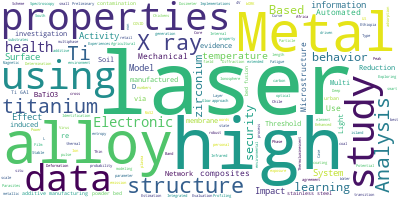

In [33]:
import pandas as pd
import os 
import re
from wordcloud import WordCloud

# Leemos los datos
papers = pd.read_excel('DatosInvestigacion2.xlsx')
# Eliminamos las columnas
papers = papers.drop(columns=['ID', 'MES', 'AÑO', 'AUTORES', 'CITACIONES', 'REFERENCIAS'], axis=1).sample(100)
# Quitar 
papers['TITULO_processed'] = \
papers['TITULO'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convertir los títulos a minúsculas 
papers['TITULO_processed'] = \
papers['TITULO'].map(lambda x: x.lower())
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['TITULO'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [34]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'Security', 'TI'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.TITULO.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"study" + 0.010*"reduction" + 0.010*"layer" + 0.010*"learning" + '
  '0.010*"batio" + 0.010*"activity" + 0.007*"phase" + 0.007*"threshold" + '
  '0.005*"us" + 0.005*"surface"'),
 (1,
  '0.011*"exposure" + 0.011*"parasites" + 0.009*"chickens" + 0.008*"work" + '
  '0.007*"ti" + 0.006*"relationship" + 0.006*"healthy" + 0.006*"enhanced" + '
  '0.006*"type" + 0.006*"indian"'),
 (2,
  '0.014*"zirconium" + 0.013*"additive" + 0.012*"data" + 0.009*"laser" + '
  '0.009*"bed" + 0.009*"system" + 0.009*"security" + 0.009*"health" + '
  '0.009*"manufacturing" + 0.009*"fusion"'),
 (3,
  '0.028*"high" + 0.014*"metal" + 0.014*"temperature" + 0.010*"ionosphere" + '
  '0.010*"virus" + 0.010*"entropy" + 0.010*"laser" + 0.010*"field" + '
  '0.005*"surrogate" + 0.005*"substrates"'),
 (4,
  '0.016*"laser" + 0.010*"high" + 0.010*"analysis" + 0.010*"alloy" + '
  '0.010*"ti" + 0.010*"properties" + 0.010*"glow" + 0.010*"identification" + '
  '0.010*"ray" + 0.007*"titanium"'),
 (5,
  '0.013*"electro

In [36]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./USS-DMDB-Taller2'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './USS-DMDB-Taller2'+ str(num_topics) +'.html')

LDAvis_prepared

c:\Users\Admn\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.128335  0.116230       1        1  14.921194
2     -0.093546  0.075067       2        1  12.867094
4     -0.052695  0.071241       3        1  12.405937
3     -0.104628 -0.054777       4        1  11.748069
0      0.079419 -0.098030       5        1  10.296271
1      0.042781 -0.021164       6        1   9.424269
9     -0.005210 -0.030763       7        1   8.069686
8     -0.013645  0.017734       8        1   8.046661
5      0.015458 -0.069672       9        1   7.556890
7      0.003731 -0.005866      10        1   4.663929, topic_info=               Term      Freq     Total Category  logprob  loglift
16             high  5.000000  5.000000  Default  30.0000  30.0000
5          learning  2.000000  2.000000  Default  29.0000  29.0000
19            metal  5.000000  5.000000  Default  28.0000  28.0000
103           laser  6.000000  6.000000  Default  27.0000  27.0000
105      properties  3.000000  3.000000  Default  26.0000  26.0000
..              ...       ...       ...      ...      ...      ...
199           light  0.436984  2.143459  Topic10  -4.7482   1.4750
130     information  0.436976  2.791720  Topic10  -4.7482   1.2108
18       mechanical  0.436971  2.062581  Topic10  -4.7482   1.5135
227            deep  0.436968  1.489771  Topic10  -4.7482   1.8388
104  microstructure  0.436968  1.588383  Topic10  -4.7482   1.7747

[456 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
29        4  0.870813  accelerated
383       5  0.368403     activity
383       9  0.368403     activity
75        2  0.545334     additive
75        3  0.272667     additive
...     ...       ...          ...
529       1  0.812274          yam
80        1  0.322548    zirconium
80        2  0.645095    zirconium
326       1  0.812276         zone
271       2  0.847508         zrcl

[480 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 5, 4, 1, 2, 10, 9, 6, 8])